# Датасет Кати (с использованием классов)

In [9]:
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib
import pickle

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [10]:
from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *
import scipy.stats

In [11]:
def save_obj(obj, name):
    os.makedirs("obj/Chinese/Non Healthy with Classes", exist_ok=True)
    with open('obj/Chinese/Non Healthy with Classes/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/Chinese/Non Healthy with Classes/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [12]:
dataset = pd.read_csv('../datasets/chinese.csv', sep=',')
dataset

,id,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,f_label,sex,age
0,0,0.076632,NaN,0.279263,0.123100,NaN,171.184023,5,0,74
1,1,0.107158,NaN,0.298000,0.112200,NaN,187.826087,1,0,74
2,2,0.082800,NaN,0.284947,0.108200,NaN,186.244078,2,0,74
3,3,0.081500,NaN,0.314706,0.142556,NaN,185.546875,2,0,74
4,4,0.075053,NaN,0.268421,0.084762,NaN,170.239596,7,0,74
...,...,...,...,...,...,...,...,...,...,...
23995,23995,0.104125,0.0,0.376000,0.153500,0.071875,75.942958,0,1,61
23996,23996,0.100500,0.0,0.413750,0.193625,0.080750,75.598488,0,1,61
23997,23997,0.094750,0.0,0.420625,0.190500,0.087500,75.062552,0,1,61
23998,23998,0.091500,0.0,0.416125,0.178625,0.093750,74.775673,0,1,61


In [13]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,id,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,f_label,sex,age
0,11651,0.074941,0.120240,0.353412,0.167647,0.085647,85.744909,0,0,89
1,3154,0.101161,0.150839,0.345613,0.194710,0.091677,91.328835,1,0,45
2,13036,0.070000,0.140875,0.352706,0.136706,0.075412,83.297180,0,0,57
3,9115,0.099636,0.150364,0.409091,0.224000,0.088364,69.597494,0,1,73
4,4207,0.098615,0.112400,0.412923,0.205231,0.074667,70.532915,1,1,84
...,...,...,...,...,...,...,...,...,...,...
23995,7025,0.095628,0.150056,0.358047,0.177581,0.108762,98.276266,0,0,61
23996,8486,0.105600,0.175111,0.385800,0.137200,0.070222,73.160818,0,1,73
23997,16717,0.093000,0.171667,0.435200,0.212933,0.084769,71.850551,0,0,14
23998,19103,0.114794,0.146333,0.327571,0.123661,0.056667,129.833868,0,0,49


In [14]:
dataset = dataset.drop(dataset[(dataset['f_label'] == 0)].index).reset_index(drop=True)
dataset

,id,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,f_label,sex,age
0,3154,0.101161,0.150839,0.345613,0.194710,0.091677,91.328835,1,0,45
1,4207,0.098615,0.112400,0.412923,0.205231,0.074667,70.532915,1,1,84
2,2263,0.101818,0.172250,0.418000,0.196400,0.080000,79.072219,1,0,53
3,2052,0.122400,NaN,0.339571,0.117714,NaN,136.874694,5,0,55
4,6188,0.121125,0.179750,0.403067,0.189625,0.095125,82.019502,5,1,50
...,...,...,...,...,...,...,...,...,...,...
6872,6383,0.086000,0.132000,0.335333,0.141333,0.056000,125.037213,2,1,53
6873,799,0.067667,NaN,0.218000,0.084000,NaN,283.757339,1,1,26
6874,4770,0.092278,0.120114,0.365500,0.172216,0.083886,77.982844,6,0,51
6875,3362,0.093429,NaN,0.322000,0.102571,0.068000,102.254851,1,1,47


In [15]:
for col in dataset:
    print(f'{col}: {dataset[col].isna().sum()} NaN vals')

id: 0 NaN vals
Qrst_dur: 4 NaN vals
P_Q_duration: 829 NaN vals
Q_T_duration: 4 NaN vals
T_duration: 3 NaN vals
P_duration: 821 NaN vals
Heart_rate: 5 NaN vals
f_label: 0 NaN vals
sex: 0 NaN vals
age: 0 NaN vals


In [16]:
quantify_nans(dataset)

Missing values 1666 (2.6917422002488163%)
Number of complete rows: 5813 (84.52813726915807%)


In [17]:
X_data_raw = dataset.drop('id', axis = 1)
X_data_raw

,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,f_label,sex,age
0,0.101161,0.150839,0.345613,0.194710,0.091677,91.328835,1,0,45
1,0.098615,0.112400,0.412923,0.205231,0.074667,70.532915,1,1,84
2,0.101818,0.172250,0.418000,0.196400,0.080000,79.072219,1,0,53
3,0.122400,NaN,0.339571,0.117714,NaN,136.874694,5,0,55
4,0.121125,0.179750,0.403067,0.189625,0.095125,82.019502,5,1,50
...,...,...,...,...,...,...,...,...,...
6872,0.086000,0.132000,0.335333,0.141333,0.056000,125.037213,2,1,53
6873,0.067667,NaN,0.218000,0.084000,NaN,283.757339,1,1,26
6874,0.092278,0.120114,0.365500,0.172216,0.083886,77.982844,6,0,51
6875,0.093429,NaN,0.322000,0.102571,0.068000,102.254851,1,1,47


## План

Построим кучу деревьев на основе:
1. Масштабирования: нормализации, стандартизации, оптимизации (если это так можно назвать),
2. 2D/3D.

## 1. Обработка датасета

### Нормализация и стандартизация

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

num_pipeline_std = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', StandardScaler()),
                        ])

X_data_prep = num_pipeline.fit_transform(X_data_raw) 
X_data_prep_std = num_pipeline_std.fit_transform(X_data_raw) 
X_prep = pd.DataFrame(X_data_prep)
X_prep_std = pd.DataFrame(X_data_prep_std)

### Оптимизация

In [19]:
'''
variable_types, binary, continuous, ordinal = detect_variable_type(dataset, 10, verbose=False)
dfq,replacement_info = quantify_dataframe_univariate(dataset, variable_types)
with open('temp.txt','w') as fid:
    fid.write(replacement_info)
'''

Matrix shape: (5813, 9)
Effective linear dimension 7
Full matrix shape (6877, 9)


,id,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,f_label,sex,age
0,3154,0.101161,0.150839,0.345613,0.194710,0.091677,91.328835,1,0,45.0
1,4207,0.098615,0.112400,0.412923,0.205231,0.074667,70.532915,1,1,84.0
2,2263,0.101818,0.172250,0.418000,0.196400,0.080000,79.072219,1,0,53.0
3,2052,0.122400,0.152142,0.339571,0.117714,0.083307,136.874694,5,0,55.0
4,6188,0.121125,0.179750,0.403067,0.189625,0.095125,82.019502,5,1,50.0
...,...,...,...,...,...,...,...,...,...,...
6872,6383,0.086000,0.132000,0.335333,0.141333,0.056000,125.037213,2,1,53.0
6873,799,0.067667,0.149725,0.218000,0.084000,0.079439,283.757339,1,1,26.0
6874,4770,0.092278,0.120114,0.365500,0.172216,0.083886,77.982844,6,0,51.0
6875,3362,0.093429,0.153119,0.322000,0.102571,0.068000,102.254851,1,1,47.0


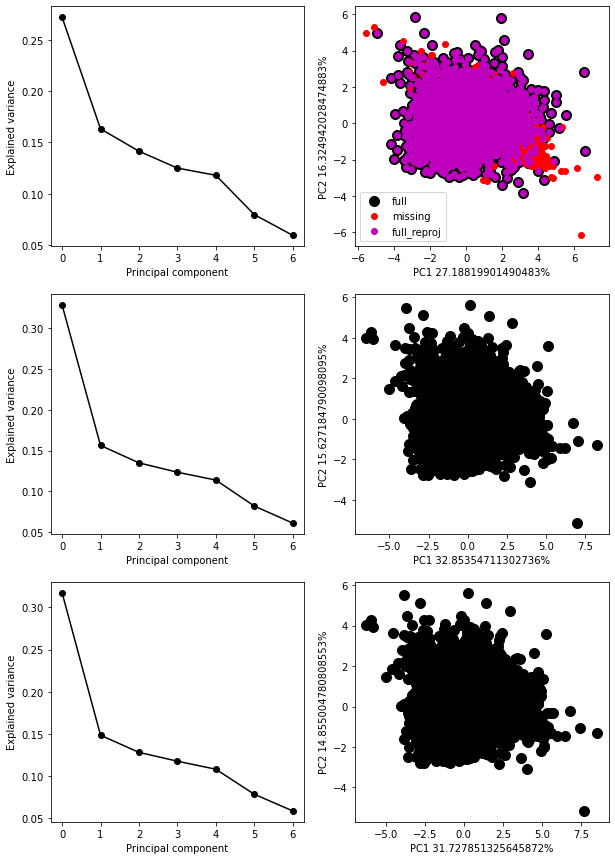

In [20]:
'''
dfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)
dequant_info = invert_quant_info(load_quantification_info('temp.txt'))
df_imputed = dequantify_table(dfq_imputed,dequant_info)
display(df_imputed)
'''

Removing  0 columns

 Initial Q2: 1.652262180527
Initial quantification table:
[array([1., 2., 3., 4., 5., 6., 7., 8., 9.])]
Monotonicity: (True, 1.0)
Iteration 0 Q2= 1.652262180527
Iteration 1 Q2= 1.6522621805270017
Iteration 2 Q2= 1.6524950510478202
Iteration 3 Q2= 1.652529321240305
Iteration 4 Q2= 1.6525379722585054
Iteration 5 Q2= 1.6525381079852162

 Q2 after update: 1.652538120710311
Final quantification table:
[array([-1.60579279, -1.07929315, -0.38869574, -0.17940426,  0.36730742,
        0.36731121,  0.9741682 ,  1.43722602,  1.55077679])]
Monotonicity: (True, 3.7918555622074024e-06)


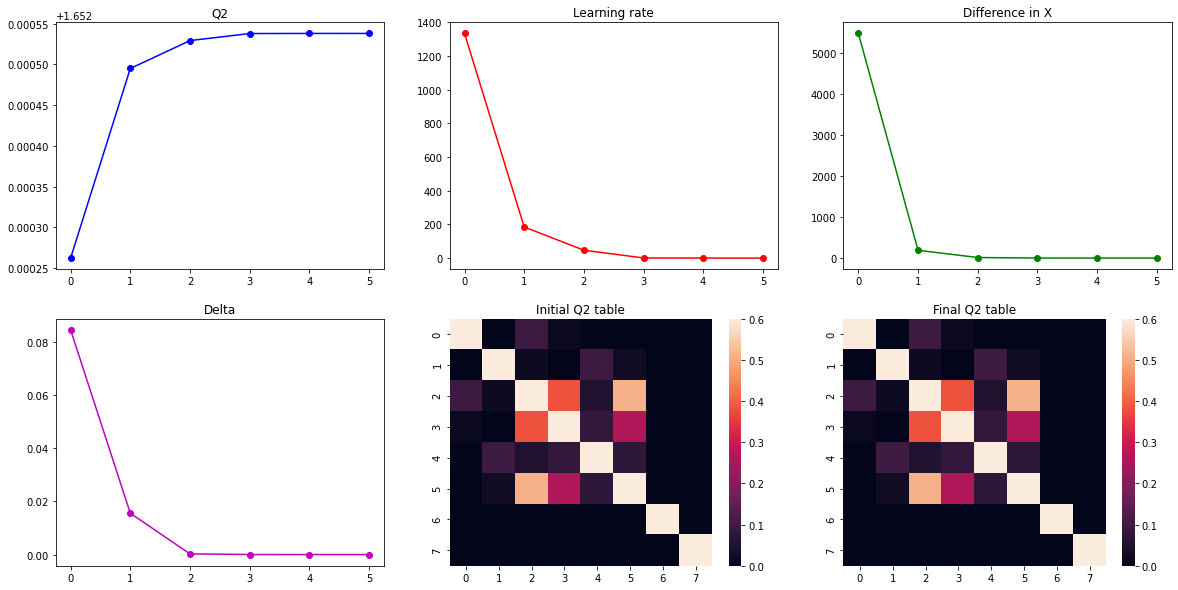

In [21]:
'''
df = remove_constant_columns_from_dataframe(df_imputed)
variable_names = [str(s) for s in df.columns[1:]]
X = df[df.columns[1:]].to_numpy()
X_orig_opt = X
X_before_scaling = X.copy()
X_opt, cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)
'''

In [22]:
'''
save_obj(df, "dataframe_opt")
save_obj(X_opt, "X_opt")
save_obj(cik, "cik")
save_obj(X_orig_opt, "X_orig_opt")
save_obj(X_before_scaling, "X_before_scaling")
'''

In [23]:
X_opt = load_obj("X_opt")
cik = load_obj("cik")
X_orig_opt = load_obj("X_orig_opt")
X_before_scaling = load_obj("X_before_scaling")
dataframe_opt = load_obj("dataframe_opt")

In [24]:
np.random.shuffle(X_orig_opt)

## 2. Построение деревьев

In [25]:
import elpigraph
from elpigraph import computeElasticPrincipalTree

nnodes = 50
X_norm = X_prep.to_numpy()
X_std = X_prep_std.to_numpy()

In [26]:
def do_PCA(X):
    # reduced_dimension = 12
    X_to_PCA = scipy.stats.zscore(X)
    pca = PCA(n_components=X_to_PCA.shape[1],svd_solver='full')
    Y = pca.fit_transform(X_to_PCA)
    v = pca.components_.T
    mean_val = np.mean(X_to_PCA,axis=0)
    return Y[:], v, mean_val # ,0:reduced_dimension]

X_pca_norm, components_norm, mnval_norm = do_PCA(X_norm)
X_pca_std, components_std, mnval_std = do_PCA(X_std)
X_pca_opt, components_opt, mnval_opt = do_PCA(X_opt)

In [27]:
def create_extended_tree(X, nnodes):
    tree_elpi = computeElasticPrincipalTree(X, nnodes, alpha=0.01, Mu=0.1, Lambda=0.05, FinalEnergy='Penalized')[0]
    prune_the_tree(tree_elpi)
    tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)
    return tree_extended

'''
tree_norm = create_extended_tree(X_pca_norm, 50)
tree_std = create_extended_tree(X_pca_std, 50)
tree_opt = create_extended_tree(X_pca_opt, 50)
'''

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
9 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  6877  points and  9  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

9||50	4.7416	50	49	30	9	0	0	4.1978	4.1914	0.5336	0.5344	0.5261	0.0178	0.8902	44.5116	0


42.7092  seconds elapsed
Removed 4 vertices and 4 edges
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Su

In [28]:
'''
save_obj(tree_norm, "chinese_tree_norm")
save_obj(tree_std, "chinese_tree_std")
save_obj(tree_opt, "chinese_tree_opt")
'''

In [29]:
tree_norm = load_obj("chinese_tree_norm")
tree_std = load_obj("chinese_tree_std")
tree_opt = load_obj("chinese_tree_opt")

In [30]:
X_orig_imputer = SimpleImputer(strategy="median").fit_transform(X_data_raw)
variable_names = [str(s) for s in dataframe_opt.columns[1:]]

## 3. Визуализация деревьев

### Окраска ветвей деревьев

In [31]:
def tree_visualization(tree_elpi, X, X_orig, components_vec, mean_val):
    vec_labels_by_branches = partition_data_by_tree_branches(X, tree_elpi)

    partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = tree_elpi['NodePositions'], 
                                                        SquaredX = np.sum(X**2,axis=1,keepdims=1),
                                                        MaxBlockSize = 100000000, TrimmingRadius = np.inf
                                                        )
    partition_by_node = np.zeros(len(partition))
    for i,p in enumerate(partition):
        partition_by_node[i] = p[0]

    variable_names = [str(s) for s in dataset.columns[1:]]
    visualize_eltree_with_data(tree_elpi, X, X_orig, components_vec, mean_val, 'k', variable_names,
                              Color_by_partitioning = True, visualize_partition = vec_labels_by_branches)

In [32]:
figsize=(15, 12)

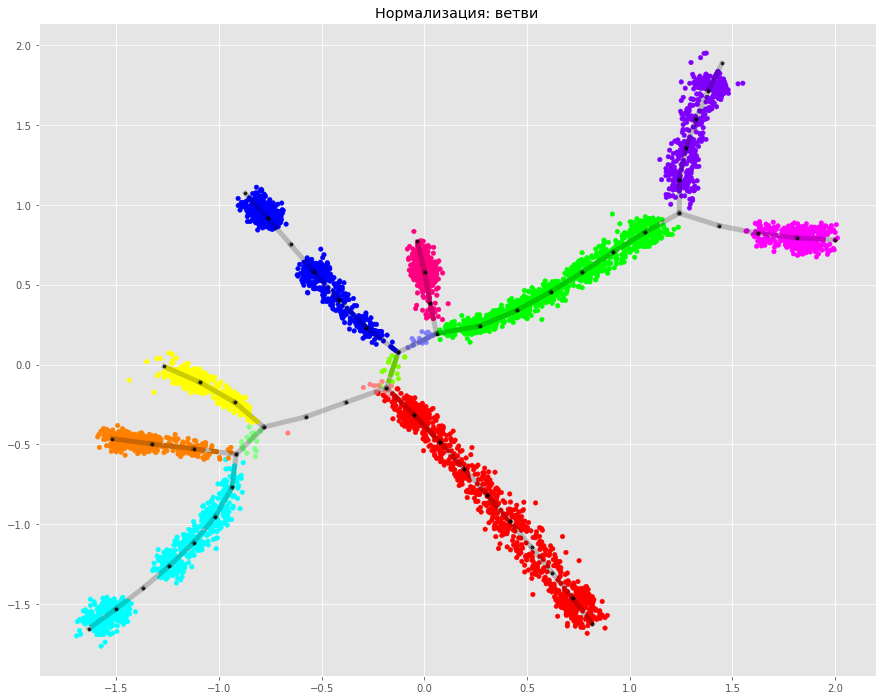

In [33]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm)
plt.title("Нормализация: ветви")
plt.show()

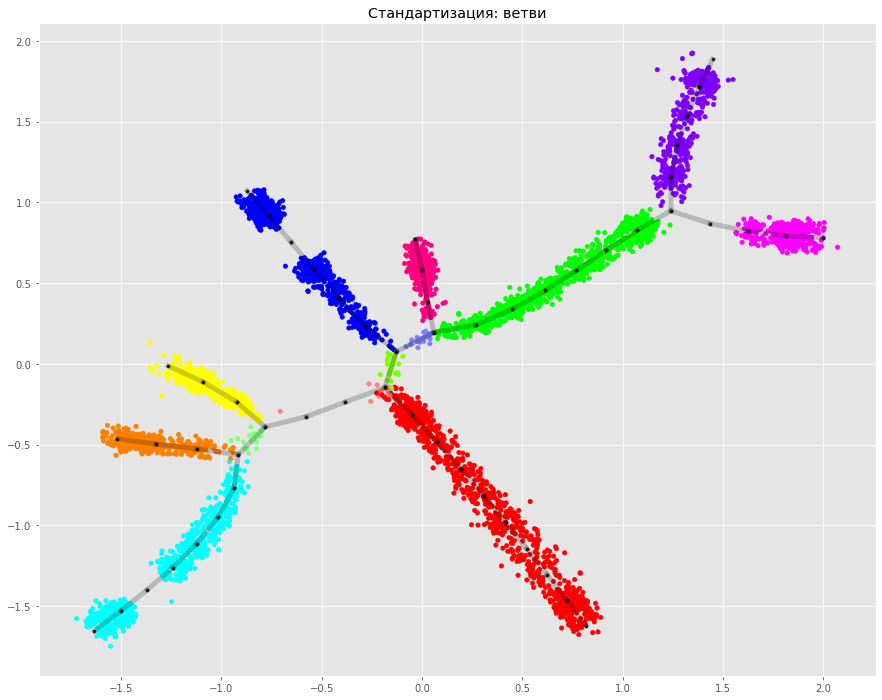

In [34]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std)
plt.title("Стандартизация: ветви")
plt.show()

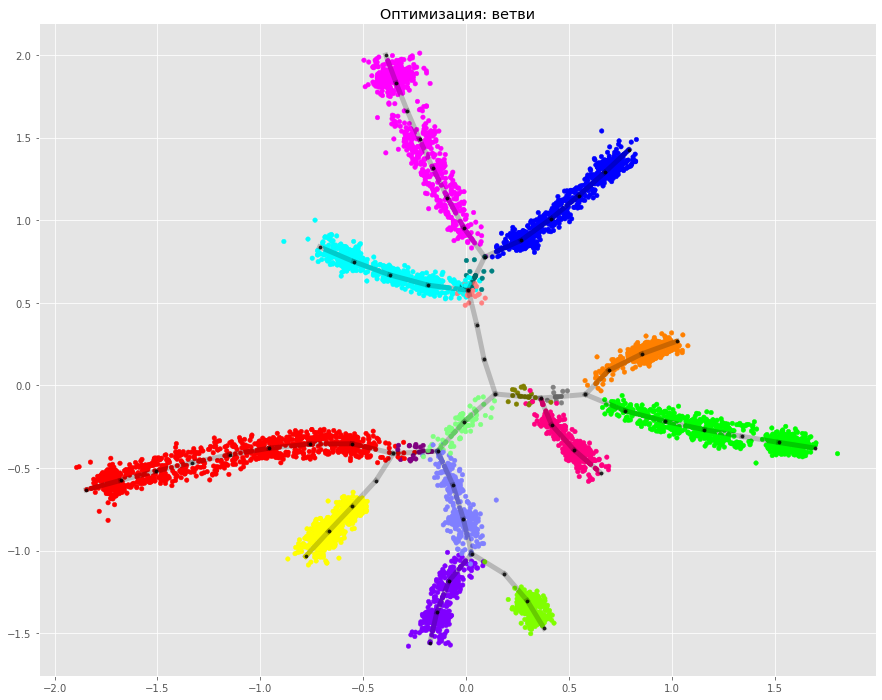

In [35]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt)
plt.title("Оптимизация: ветви")
plt.show()

### Визуализация атрибутов и исследование деревьев

#### Нормализация

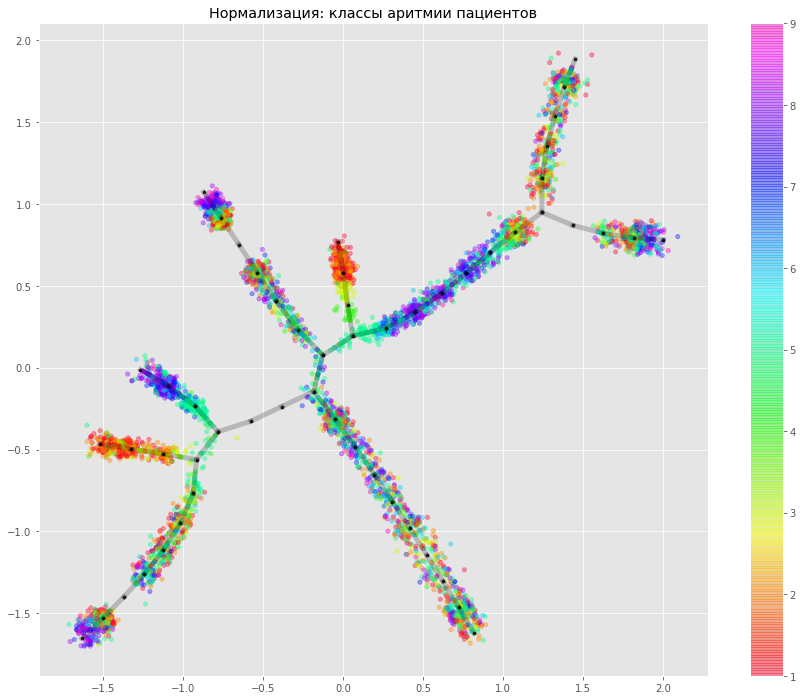

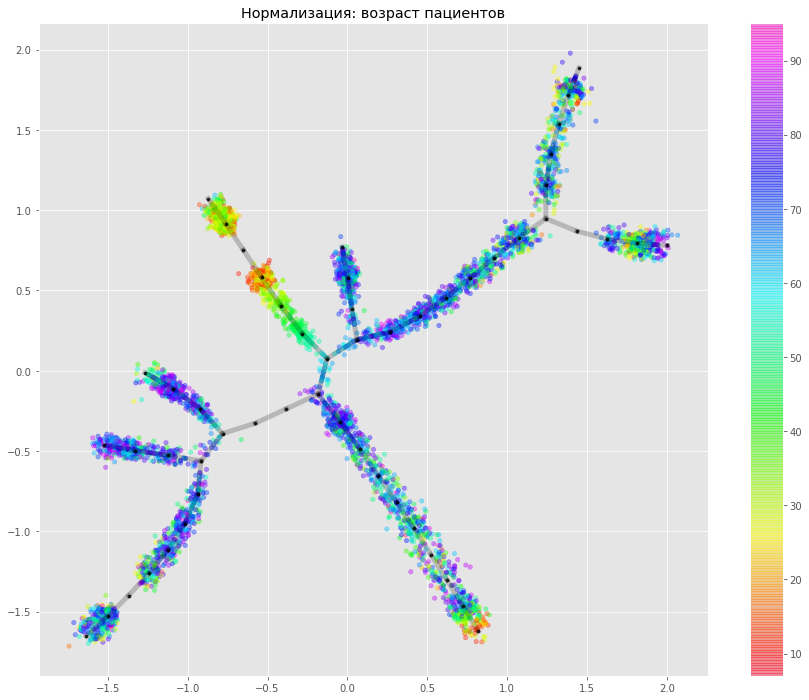

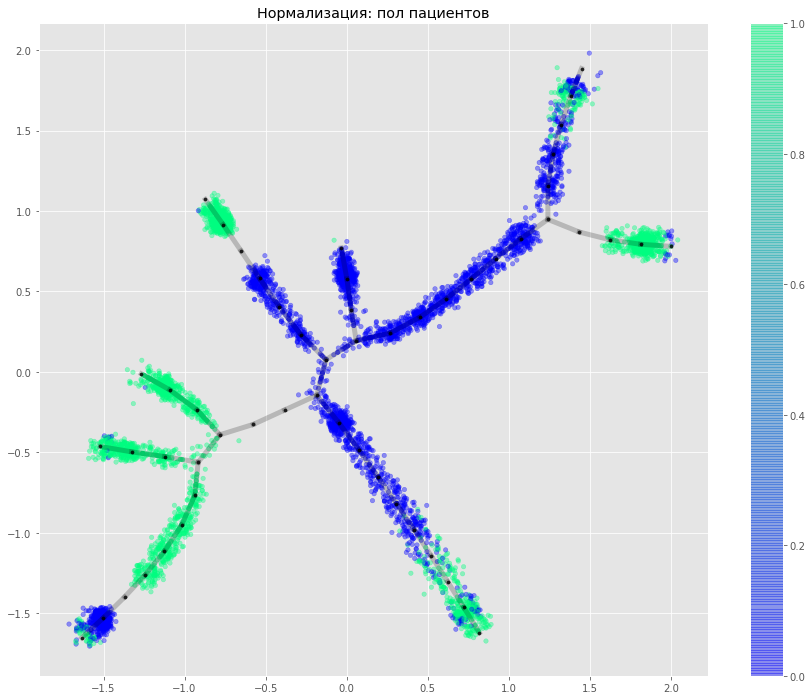

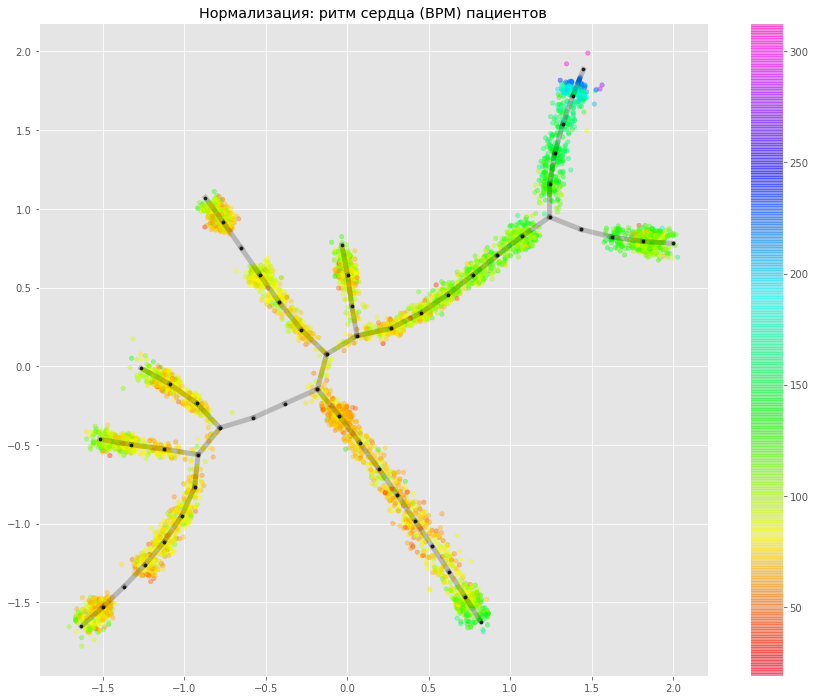

In [36]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='f_label', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Нормализация: классы аритмии пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='age', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Нормализация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='sex', cmap='winter', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Нормализация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='Heart_rate', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Нормализация: ритм сердца (BPM) пациентов")
plt.show()

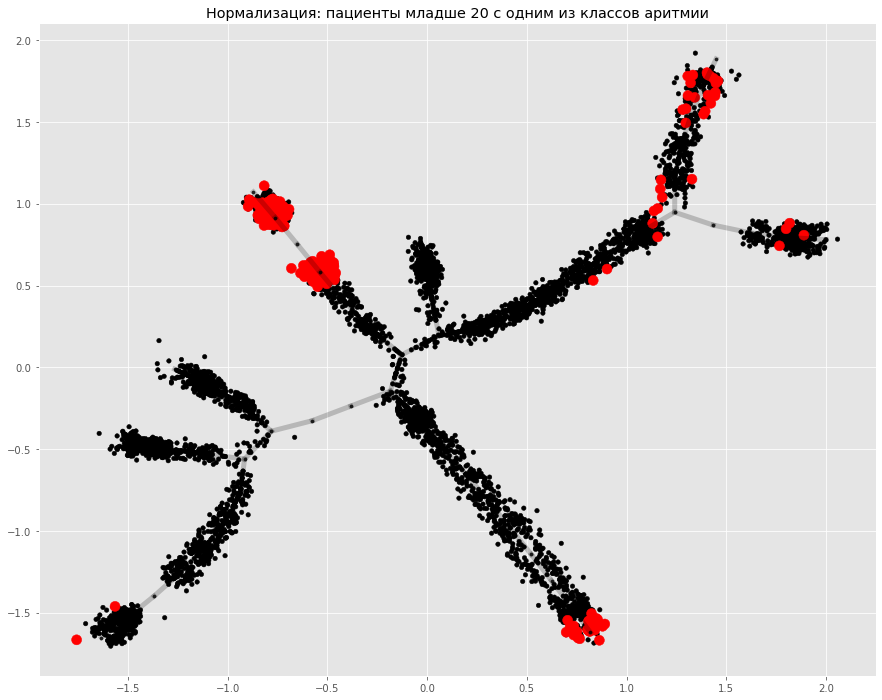

In [37]:
some_age = 20
fig = plt.figure(figsize=figsize)
inds = np.where((X_orig_imputer[:,variable_names.index('age')] <= some_age) & 
                (X_orig_imputer[:,variable_names.index('f_label')] >= 0))[0]
colors = ['k' for i in range(len(X_pca_norm))]
for i in inds:
    colors[i] = 'r'
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, colors, variable_names,
                          highlight_subset=inds, cmap='hot')
plt.title(f"Нормализация: пациенты младше {some_age} с одним из классов аритмии")
plt.show()

#### Оптимизация

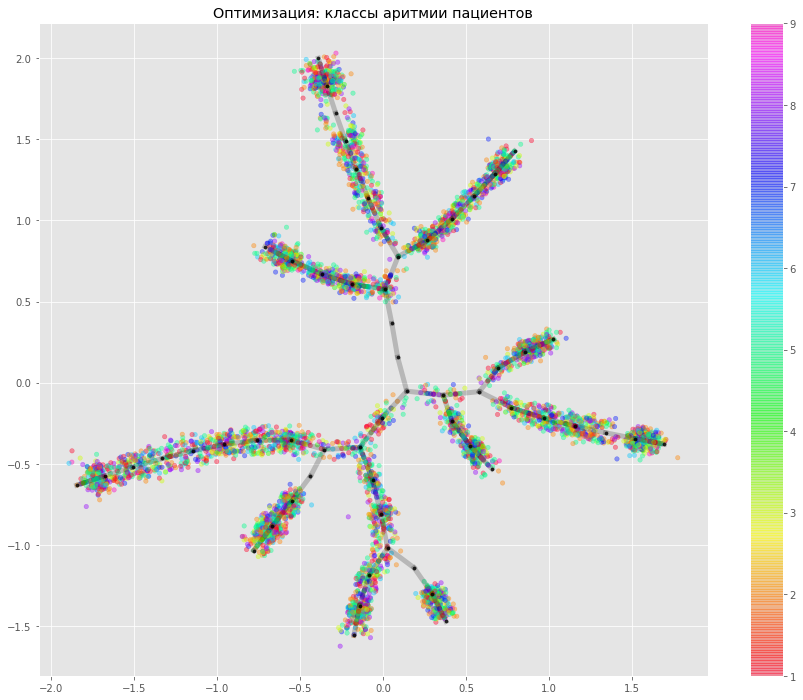

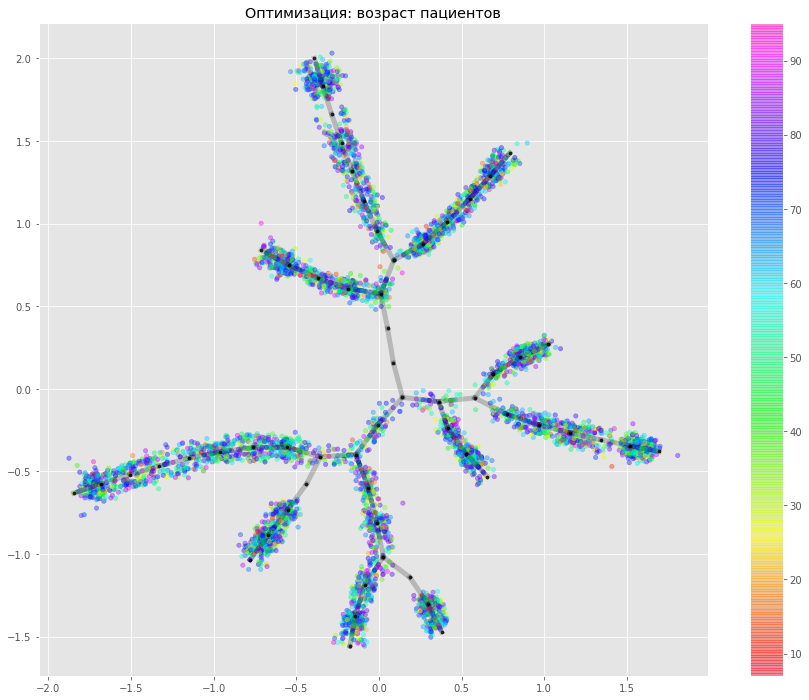

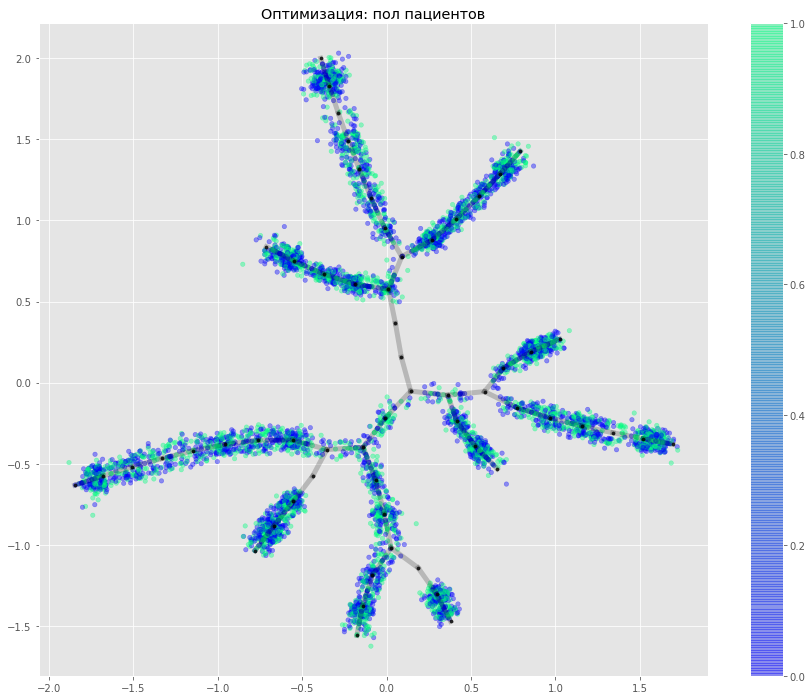

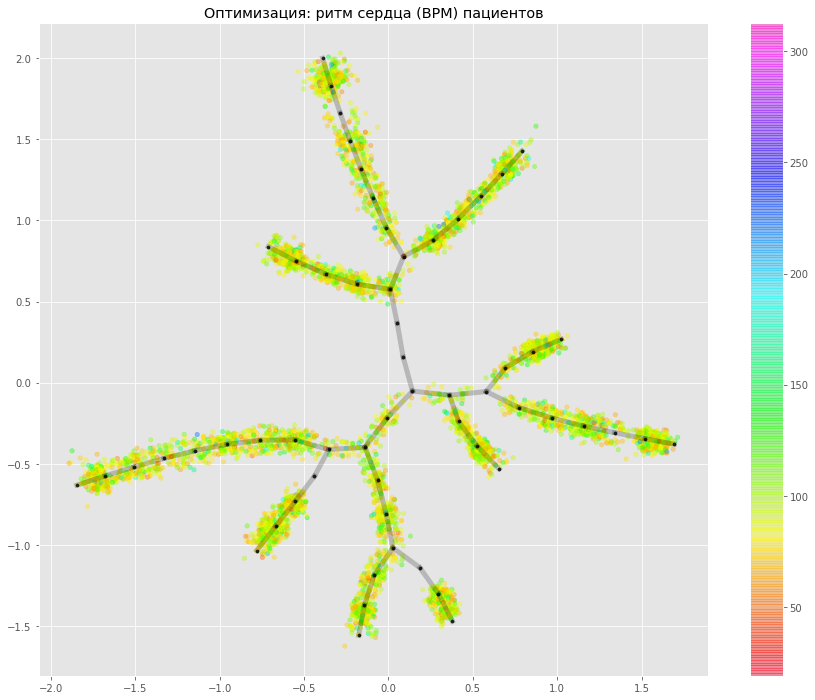

In [38]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='f_label', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Оптимизация: классы аритмии пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='age', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Оптимизация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='sex', cmap='winter', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Оптимизация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='Heart_rate', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Оптимизация: ритм сердца (BPM) пациентов")
plt.show()

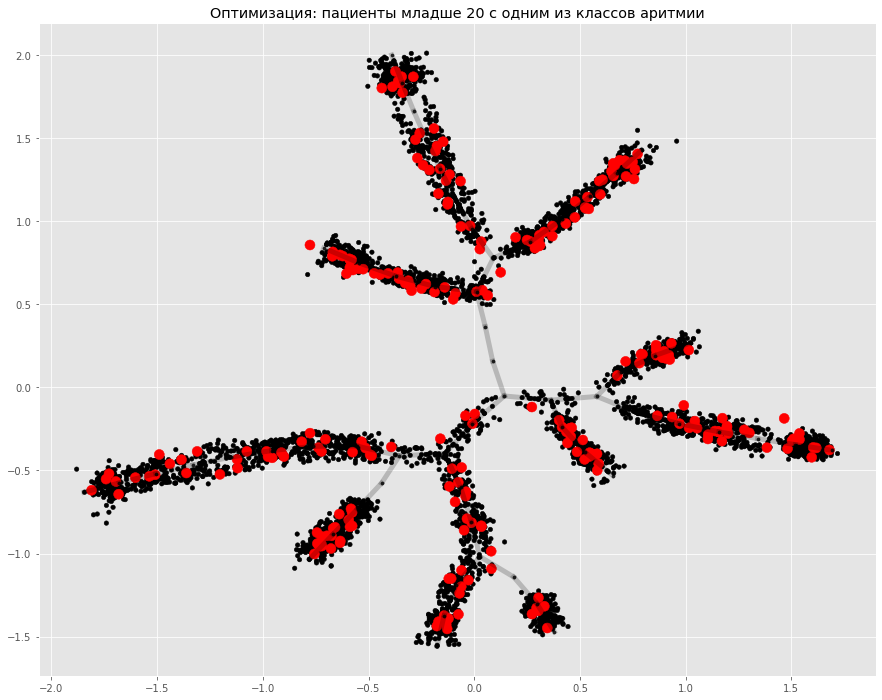

In [39]:
some_age = 20
fig = plt.figure(figsize=figsize)
inds = np.where((X_orig_opt[:,variable_names.index('age')] <= some_age) & 
                (X_orig_opt[:,variable_names.index('f_label')] >= 0))[0]
colors = ['k' for i in range(len(X_pca_opt))]
for i in inds:
    colors[i] = 'r'
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, colors, variable_names,
                          highlight_subset=inds, cmap='hot')
plt.title(f"Оптимизация: пациенты младше {some_age} с одним из классов аритмии")
plt.show()